In [1]:
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt

In [ ]:
# URL do arquivo CSV
url = 'https://dadosabertos.mec.gov.br/images/conteudo/prouni/2020/ProuniRelatorioDadosAbertos2020.csv'



In [91]:
import requests
# Fazer o download do conteúdo do CSV
response = requests.get(url)
# Salvar o conteúdo em um arquivo local
with open('ProuniRelatorioDadosAbertos2020.csv', 'wb') as file:
    file.write(response.content)

In [102]:

# Carregar o arquivo CSV
df = pd.read_csv('ProuniRelatorioDadosAbertos2020.csv', encoding='ISO-8859-1', on_bad_lines='skip', sep=';')

# Exibir as primeiras linhas para entender a estrutura dos dados
print(df.head())

   ANO_CONCESSAO_BOLSA  CODIGO_EMEC_IES_BOLSA                NOME_IES_BOLSA  \
0                 2020                    322         UNIVERSIDADE PAULISTA   
1                 2020                    163    UNIVERSIDADE ESTÁCIO DE SÁ   
2                 2020                  17670     FACULDADE DE QUIXERAMOBIM   
3                 2020                    203  UNIVERSIDADE SÃO JUDAS TADEU   
4                 2020                    203  UNIVERSIDADE SÃO JUDAS TADEU   

      MUNICIPIO                            CAMPUS TIPO_BOLSA  \
0      IPATINGA                          IPATINGA   INTEGRAL   
1     FORTALEZA               EAD VIA CORPVS - CE   INTEGRAL   
2  QUIXERAMOBIM  FACULDADE DE QUIXERAMOBIM - UNIQ   INTEGRAL   
3     SAO PAULO                          PAULISTA    PARCIAL   
4     SAO PAULO                          PAULISTA   INTEGRAL   

  MODALIDADE_ENSINO_BOLSA NOME_CURSO_BOLSA NOME_TURNO_CURSO_BOLSA  \
0                     EAD        PEDAGOGIA      CURSO A DISTÂNCIA   
1 

In [104]:
# Verificar os nomes das colunas no DataFrame
print(df.columns)


Index(['ANO_CONCESSAO_BOLSA', 'CODIGO_EMEC_IES_BOLSA', 'NOME_IES_BOLSA',
       'MUNICIPIO', 'CAMPUS', 'TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA',
       'NOME_CURSO_BOLSA', 'NOME_TURNO_CURSO_BOLSA', 'CPF_BENEFICIARIO',
       'SEXO_BENEFICIARIO', 'RACA_BENEFICIARIO', 'DATA_NASCIMENTO',
       'BENEFICIARIO_DEFICIENTE_FISICO', 'REGIAO_BENEFICIARIO',
       'UF_BENEFICIARIO', 'MUNICIPIO_BENEFICIARIO'],
      dtype='object')


In [105]:
# Agrupar por nome da instituição, nome do curso e tipo de bolsa, e contar a quantidade de bolsas
df_grouped = df.groupby(['NOME_IES_BOLSA', 'NOME_CURSO_BOLSA', 'TIPO_BOLSA']).size().reset_index(name='count')

# Exibir as primeiras linhas do DataFrame agrupado
print(df_grouped.head(10))


                        NOME_IES_BOLSA    NOME_CURSO_BOLSA TIPO_BOLSA  count
0  AJES - FACULDADE DO VALE DO JURUENA  CIÊNCIAS CONTÁBEIS   INTEGRAL      3
1  AJES - FACULDADE DO VALE DO JURUENA             DIREITO   INTEGRAL      5
2  AJES - FACULDADE DO VALE DO JURUENA        FISIOTERAPIA   INTEGRAL      1
3  AJES - FACULDADE DO VALE DO JURUENA          PSICOLOGIA   INTEGRAL      3
4         ALFA - FACULDADE DE ALMENARA             DIREITO   INTEGRAL      3
5         ALFA - FACULDADE DE ALMENARA             DIREITO    PARCIAL      8
6         ALFA - FACULDADE DE ALMENARA          ENFERMAGEM   INTEGRAL      3
7         ALFA - FACULDADE DE ALMENARA          ENFERMAGEM    PARCIAL      8
8         ALFA - FACULDADE DE ALMENARA    ENGENHARIA CIVIL   INTEGRAL      2
9         ALFA - FACULDADE DE ALMENARA    ENGENHARIA CIVIL    PARCIAL      1


In [106]:
import seaborn as sns

In [107]:
# Filtrar para uma instituição específica, por exemplo, 'Universidade Federal'
instituicao_especifica = df_grouped[df_grouped['NOME_IES_BOLSA'] == 'Universidade Federal']

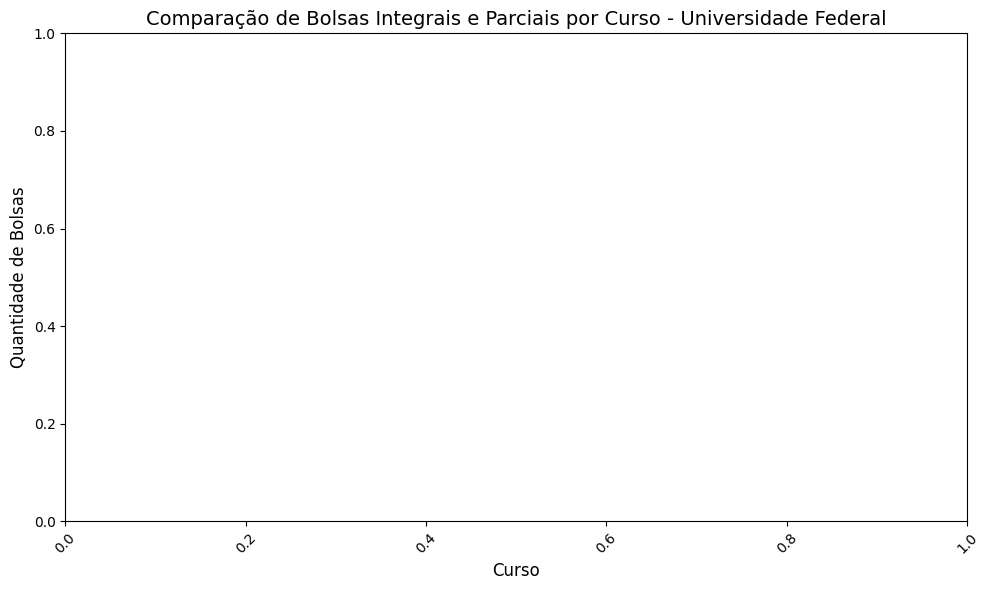

In [110]:
# Criar gráfico de barras para comparar bolsas integrais e parciais por curso
plt.figure(figsize=(10, 6))
sns.barplot(x='NOME_CURSO_BOLSA', y='count', hue='TIPO_BOLSA', data=instituicao_especifica, palette='Set1')
# Adicionar rótulos e título
plt.title('Comparação de Bolsas Integrais e Parciais por Curso - Universidade Federal', fontsize=14)
plt.xlabel('Curso', fontsize=12)
plt.ylabel('Quantidade de Bolsas', fontsize=12)
# Rotacionar os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

C:\Users\carlo\AppData\Local\Temp\ipykernel_4212\2488771003.py:11: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', 'B', 16)
C:\Users\carlo\AppData\Local\Temp\ipykernel_4212\2488771003.py:14: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt="Relatório: Comparação de Bolsas Integrais e Parciais", ln=True, align='C')
C:\Users\carlo\AppData\Local\Temp\ipykernel_4212\2488771003.py:14: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, txt="Relatório: Comparação de Bolsas Integrais e Parciais", ln=True, align='C')
C:\Users\carlo\AppData\Local\Temp\ipykernel_4212\2488771003.py:17: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', '', 12)
C:\Users\c

Relatório PDF gerado com sucesso!


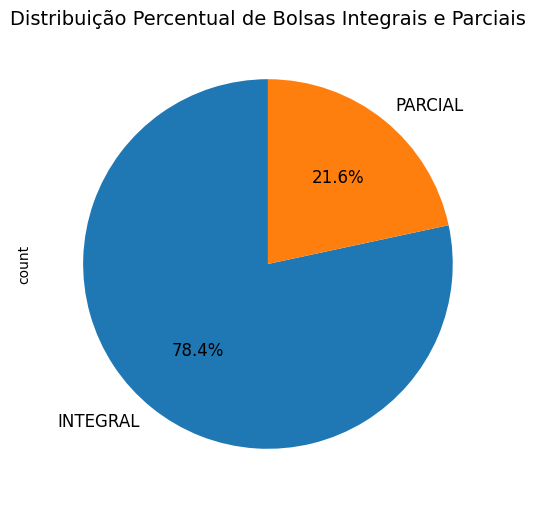

In [118]:
from fpdf import FPDF


# Criar um objeto PDF
pdf = FPDF()

# Adicionar uma página
pdf.add_page()

# Configurar a fonte
pdf.set_font('Arial', 'B', 16)

# Adicionar título ao PDF
pdf.cell(200, 10, txt="Relatório: Comparação de Bolsas Integrais e Parciais", ln=True, align='C')

# Adicionar subtítulo
pdf.set_font('Arial', '', 12)
pdf.ln(10)  # Adicionar uma linha
pdf.cell(200, 10, txt="Distribuição de bolsas por curso e tipo (parcial ou integral).", ln=True, align='C')

# Adicionar mais texto explicativo ao PDF
pdf.ln(10)  # Adicionar um espaço antes do texto explicativo
pdf.multi_cell(0, 10, txt="Este gráfico mostra a distribuição percentual das bolsas integrais e parciais para diferentes cursos. "
                          "A partir dessa análise, podemos observar como o programa Prouni distribui bolsas em diferentes "
                          "modalidades para diversos cursos e regiões do Brasil.")

# Salvar o gráfico como imagem, ajustando o tamanho
plt.figure(figsize=(6, 6))  # Tamanho do gráfico
df_grouped.groupby('TIPO_BOLSA')['count'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title('Distribuição Percentual de Bolsas Integrais e Parciais', fontsize=14)
plt.savefig('grafico_bolsas_corrigido.png')

# Inserir o gráfico no PDF após o texto
pdf.ln(10)  # Adicionar uma linha em branco para espaçamento
pdf.image('grafico_bolsas_corrigido.png', x=10, y=None, w=140)  # 'y=None' coloca o gráfico logo abaixo do texto

# Salvar o PDF no diretório atual
pdf.output("relatorio_bolsas_corrigido.pdf")

print("Relatório PDF gerado com sucesso!")
